In [2]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider
import tkinter as tk
from tkinter.filedialog import askopenfilename
import matplotlib.pyplot as plt
import random

# Micro Pile Design

In [3]:
# create user form to input values
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Grout unconfined compressive strength, fc (ksi)'),
        FloatText()], layout=form_item_layout),
    Box([Label(value='Outside diameter of casing (inches)'),
        FloatText()], layout=form_item_layout),
    Box([Label(value='Thickness of casing (inches)'),
        FloatText()], layout=form_item_layout),
    Box([Label(value='Casing yield strength (ksi)'),
        FloatText()], layout=form_item_layout),
    Box([Label(value='Rebar yield strength (ksi)'),
        FloatText()], layout=form_item_layout),
    Box([Label(value='Rebar Type'),
        Dropdown(options=['#10','#11', '#14'])], layout=form_item_layout),
]

print("Structural Values")
form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

Structural Values


Box(children=(Box(children=(Label(value='Grout unconfined compressive strength, fc (ksi)'), FloatText(value=0.…

In [ ]:
#assign variables to the values put into the form

fc_grout_w = form.children[0].children[1]
fc_grout = fc_grout_w.value

OD_casing_w = form.children[1].children[1]
OD_casing = OD_casing_w.value

casing_thickness_w =form.children[2].children[1]
casing_thickness = casing_thickness_w.value

casing_yield_w = form.children[3].children[1]
casing_yield = casing_yield_w.value

rebar_yield_w = form.children[4].children[1]
rebar_yield = rebar_yield_w.value

rebar_type_w = form.children[5].children[1]
rebar_type = rebar_type_w.value

#make sure everything is where it should be 
#print(fc_grout,OD_casing,casing_thickness,casing_yield,rebar_yield,rebar_type)

In [ ]:
# determine additional structural values based on the input variables 
# rebar_dict is laid out as rebar number (key): weight(lb/ft), bar diameter(in), cross sectional area(in2)
rebar_dict = {"#10":[4.303, 1.27, 1.27],
              "#11":[5.313,1.41,1.56],
              "#14":[7.65,1.693,2.25]
             }
rebar_list = rebar_dict[rebar_type]
A_rebar = rebar_list[2]

A_grout = ((OD_casing - casing_thickness*2)**2*3.14)/4 - A_rebar

A_casing = OD_casing**2*3.14/4 - ((OD_casing - casing_thickness*2)**2*3.14)/4

steel_mod = 29000
concrete_mod = (57000*(fc_grout*1000)**(1/2))/1000

## Maximum Allowable Compression (Cased Length)

In [5]:
#calculate allowable compression load

#check strain compatibility 
'''using maximum concrete strain of 0.003 to determine the maximum stress per FHWA NHI-05-039
'''
max_strain = 0.003
straincomp_casing = (steel_mod * max_strain)
straincomp_rebar = (steel_mod * max_strain)
straincomp_grout = (concrete_mod * max_strain)

straincomp_steel = min(straincomp_casing, straincomp_rebar, casing_yield, rebar_yield)

'''section 5.6 of FHWA NHI-05-039 specifies to use minimum yield stress in allowable compression 
based on 0.003 maximum strain on concrete vs structural yield of all steel components
'''
Pc_allowable = .4*fc_grout * A_grout + .47*straincomp_steel*(A_rebar + A_casing)


print("Allowable compression load:", round(Pc_allowable,0), "kips (per equation 5-1 FHWA NHI-05-039)")

Allowable compression load: 800.0 kips (per equation 5-1 FHWA NHI-05-039)


## Maximum Allowable Tension (Cased Length)

In [6]:
#calculate allowable tension 
'''According to FHWA NHI-05-039 a corrosion allowance can be made by 
removing casing tensile strength from the allowable loading equation
'''

Pt_allowable = .55*straincomp_steel*(A_rebar)

print("Allowable tension load:", round(Pt_allowable,0), "kips (per equation 5-2 FHWA NHI-05-039)")

Allowable tension load: 51.0 kips (per equation 5-2 FHWA NHI-05-039)


## Maximum Allowable Compression (Uncased Length)

In [7]:
Pc_un_allowable = .4 * fc_grout * A_grout + .47 * rebar_yield * A_rebar

print("Uncased Maximum Allowable Compression: ", round(Pc_un_allowable,0), 'kips (per equation 5-7 FHWA NHI-05-039)')

Uncased Maximum Allowable Compression:  269.0 kips (per equation 5-7 FHWA NHI-05-039)


## Maximum Allowable Tension (Uncased Length)

In [8]:
Pt_un_allowable = .55 * rebar_yield * A_rebar

print("Uncased Maximum Allowable Tension: ", round(Pc_un_allowable,0), 'kips (per equation 5-8 FHWA NHI-05-039)')

Uncased Maximum Allowable Tension:  269.0 kips (per equation 5-8 FHWA NHI-05-039)


## Find your Soil Layering CSV

In [14]:
def open_and_read_csv(button):
    # Create a Tkinter root window (if not already created)
    root = tk()
    root.withdraw()  # Hide the root window

    # Use the askopenfilename function to select a file
    soil_file = askopenfilename(title="Select a CSV file", filetypes=[("CSV Files", "*.csv")])

    df = pd.read_csv(soil_file)

    root.destroy()

    return df  # Return the DataFrame

# Create a button widget
button = widgets.Button(description="Select and Read CSV")

# Use a closure to capture the returned DataFrame
def on_button_click(b):
    global soil_profile_df
    soil_profile_df = open_and_read_csv(b)

button.on_click(on_button_click)

# Display the button
display(button)

Button(description='Select and Read CSV', style=ButtonStyle())

In [141]:
#print soil layering
print(soil_profile_df.to_string(index=False))

 Layer_no  Ele_from  Ele_to  USCS  UW_sat
        1       710   702.0 SC-SM     115
        2       702   695.0 SC-SM     110
        3       695   685.0 SW-SM     120
        4       685   675.0 CL-CH     115
        5       675   670.0 CL-CH     120
        6       670   667.0  W LS     130
        7       667     NaN    LS     150


## Define Grout Bond Strength per table 5.3 in FHWA NHI-05-039

In [107]:
form_item_layout2 = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items2 = []

for i in range(soil_profile_df.shape[0]):
    form_items2.append(Box([Label(value='Layer ' + str(soil_profile_df.iloc[i,0])),
        FloatText()], layout=form_item_layout))

form2 = Box(form_items2, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
print("Input Ultimate Grout to Ground Bond Value for Each Layer")
form2

Input Ultimate Grout to Ground Bond Value for Each Layer


Box(children=(Box(children=(Label(value='Layer 1'), FloatText(value=0.0)), layout=Layout(display='flex', flex_…

In [142]:
ult_bond_list = []
micro_soil_profile_df = soil_profile_df

for i in range(soil_profile_df.shape[0]):
    temp_var = form2.children[i].children[1]
    temp_var2 = temp_var.value
    ult_bond_list.append(temp_var2)
    
micro_soil_profile_df['Ult Grout Bond'] = ult_bond_list

def FoS(x):
    return x/2

micro_soil_profile_df['Allowable Grout Bond'] = micro_soil_profile_df['Ult Grout Bond'].apply(FoS)

print(micro_soil_profile_df.to_string(index=False))

 Layer_no  Ele_from  Ele_to  USCS  UW_sat  Ult Grout Bond  Allowable Grout Bond
        1       710   702.0 SC-SM     115             7.0                   3.5
        2       702   695.0 SC-SM     110            15.0                   7.5
        3       695   685.0 SW-SM     120            22.0                  11.0
        4       685   675.0 CL-CH     115            11.0                   5.5
        5       675   670.0 CL-CH     120            11.0                   5.5
        6       670   667.0  W LS     130            75.0                  37.5
        7       667     NaN    LS     150            75.0                  37.5


## Begin Design

FloatRangeSlider(value=(667.0, 710.0), description='Range Slider', max=710.0, min=667.0, orientation='vertical…

FloatText(value=667.0, description='Lower Value')

FloatText(value=710.0, description='Upper Value')

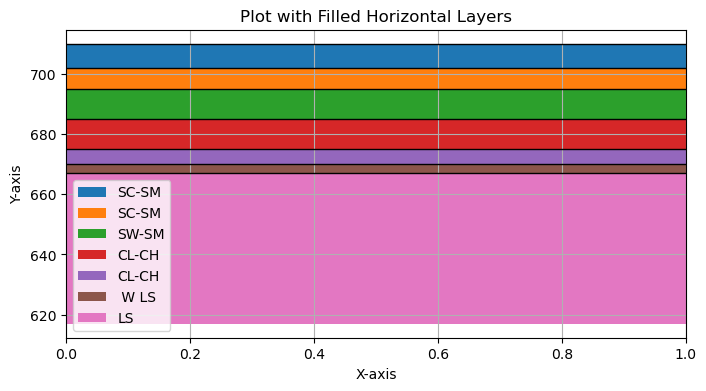

In [161]:
# Create the plot with horizontal lines filled between layers
fig, ax = plt.subplots(figsize=(8, 4))

for _, row in micro_soil_profile_df.iterrows():
    ax.fill_between([0, 1], row['Ele_from'], row['Ele_from']-50, label=row['USCS'])
    ax.plot([0, 1], [row['Ele_from'], row['Ele_from']], color='black', linewidth=1)

#micropile try
ax.plot([row['Ele_from'], row['Ele_from']], color='black', linewidth=1)
    
ax.set_xlim(0, 1)
#ax.set_ylim(min(micro_soil_profile_df.iloc[1]), max(micro_soil_profile_df.iloc[1]))
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot with Filled Horizontal Layers')
ax.grid(True)
ax.legend()

##################################################################Vertical Slider Code##################################
vertical_range_slider = widgets.FloatRangeSlider(
    value=[micro_soil_profile_df['Ele_from'].min(), micro_soil_profile_df['Ele_from'].max()],  # Initial range
    min=micro_soil_profile_df['Ele_from'].min(),               # Minimum value
    max=micro_soil_profile_df['Ele_from'].max(),              # Maximum value
    step=0.5,           # Step size
    orientation='vertical',  # Set orientation to 'vertical'
    description='Range Slider'
)

# Create two separate variables to store the slider values
lower_value = widgets.FloatText(value=vertical_range_slider.value[0], description='Lower Value')
upper_value = widgets.FloatText(value=vertical_range_slider.value[1], description='Upper Value')

# Define a function to update the variables when the slider changes
def update_slider_values(change):
    lower_value.value = change.new[0]
    upper_value.value = change.new[1]

# Link the range slider to the variables
vertical_range_slider.observe(update_slider_values, names='value')

# Display the widgets
display(vertical_range_slider, lower_value, upper_value)
##################################################################Vertical Slider Code##################################

def micropile(lower, upper):
    


plt.show()